In [2]:
%pip install pandas seaborn matplotlib
%pip show pandas seaborn matplotlib

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

Dataset shape: (150, 5)

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First few rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

D

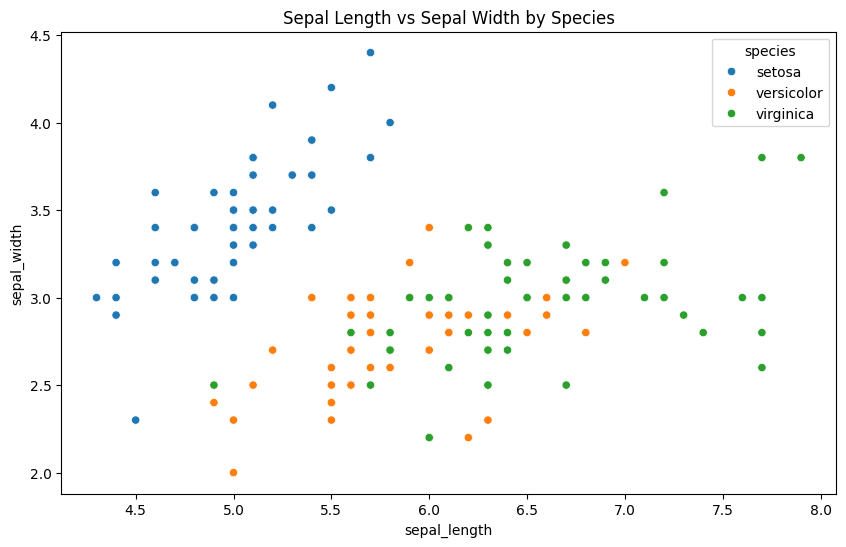

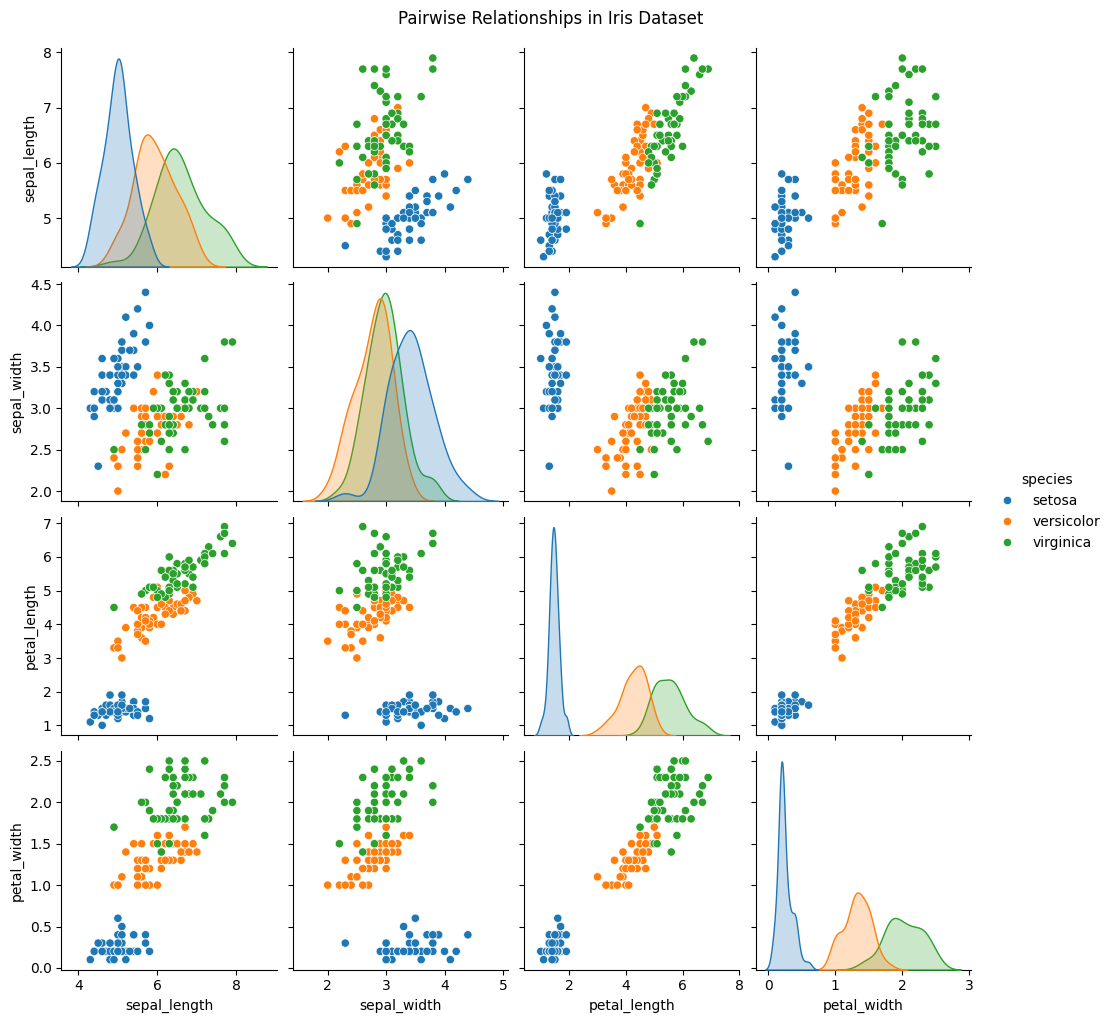

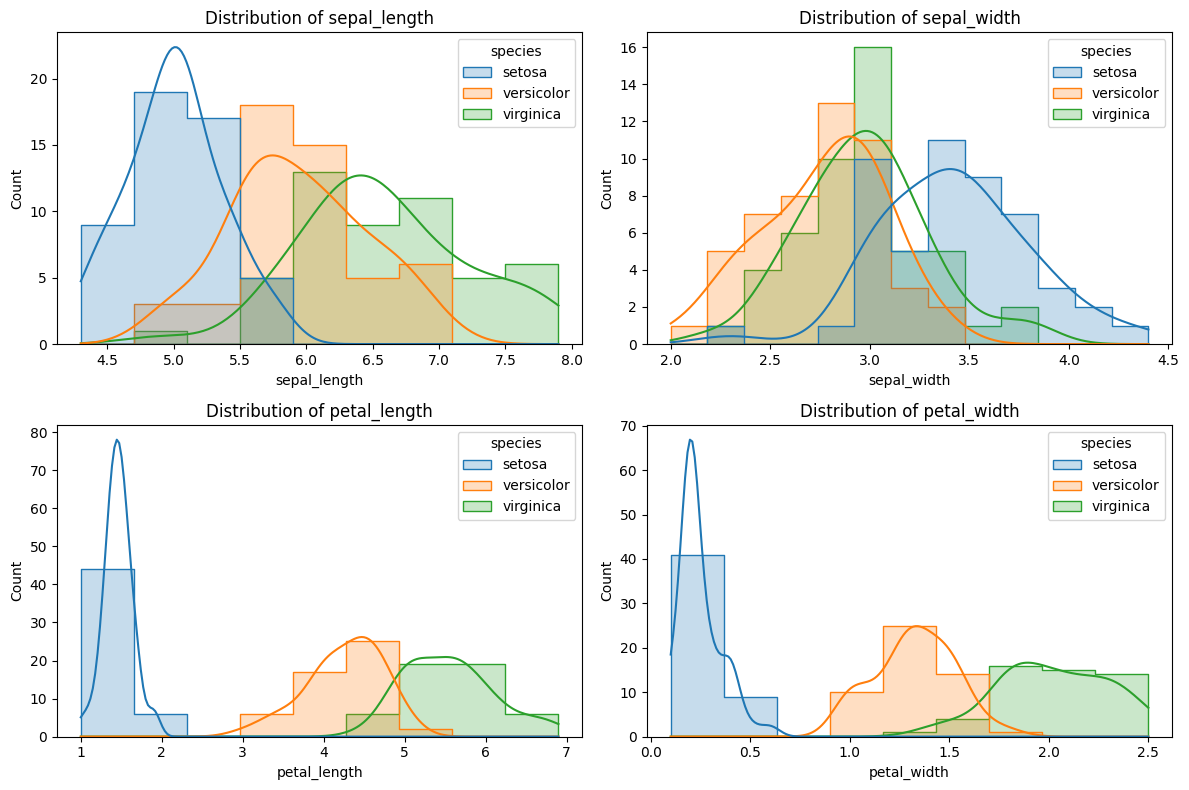

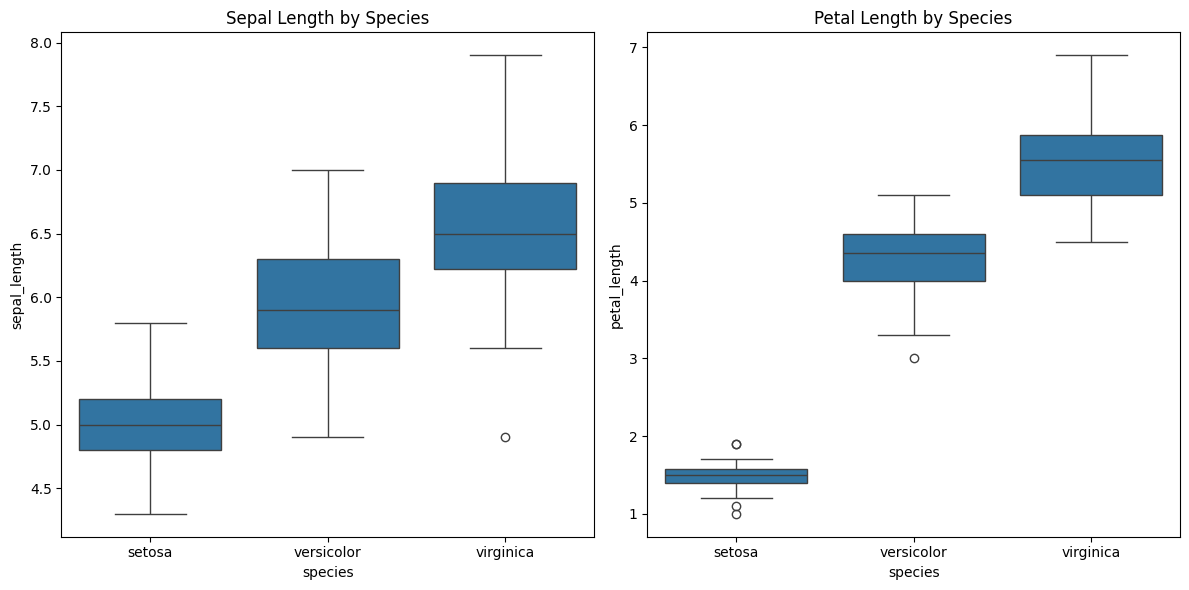

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset('iris')

# Basic inspection
print("Dataset shape:", iris.shape)
print("\nColumn names:", iris.columns.tolist())
print("\nFirst few rows:")
print(iris.head())

# Summary statistics
print("\nDataset information:")
print(iris.info())
print("\nDescriptive statistics:")
print(iris.describe())
print("\nSpecies distribution:")
print(iris['species'].value_counts())

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

sns.pairplot(iris, hue='species')
plt.suptitle('Pairwise Relationships in Iris Dataset', y=1.02)
plt.show()

plt.figure(figsize=(12, 8))
for i, column in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=iris, x=column, hue='species', element='step', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.title('Sepal Length by Species')
plt.subplot(1, 2, 2)
sns.boxplot(data=iris, x='species', y='petal_length')
plt.title('Petal Length by Species')
plt.tight_layout()
plt.show()

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Data types:
 age          float64
sex         category
cp          category
trestbps     float64
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object
Dataset shape: (303, 14)

Summary statistics:
               age    trestbps        chol     thalach     oldpeak      target
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.458746
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.499120
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.0000

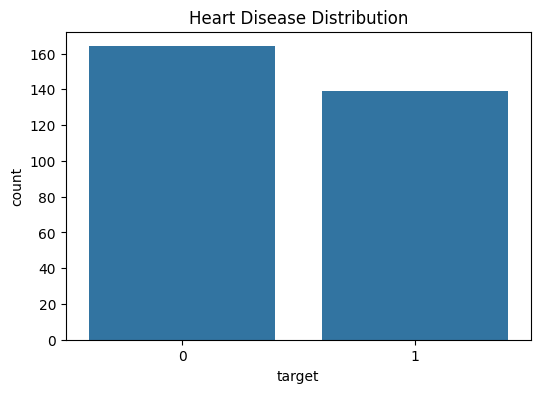

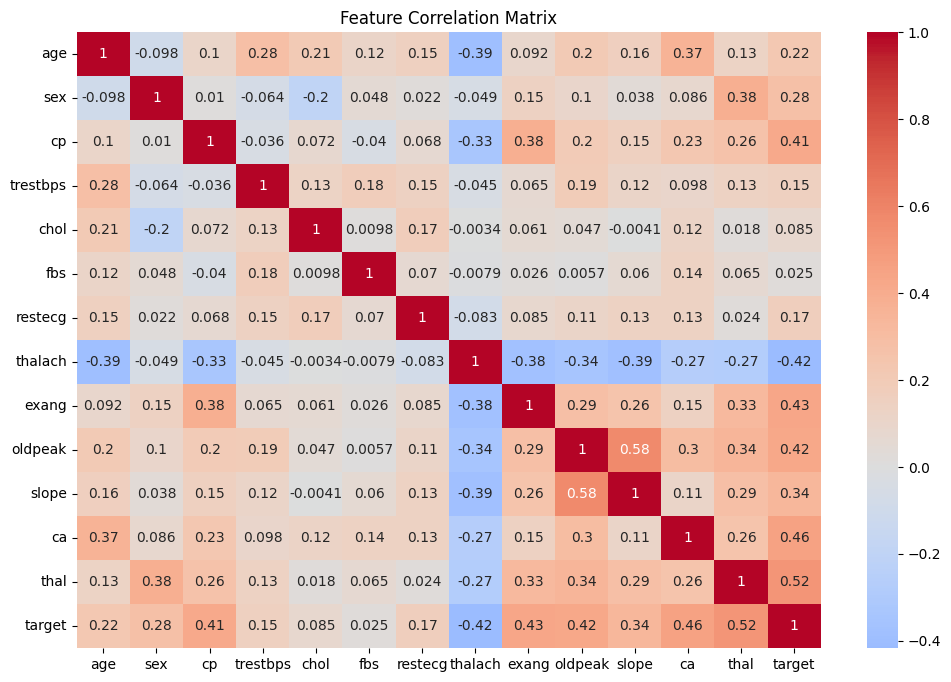

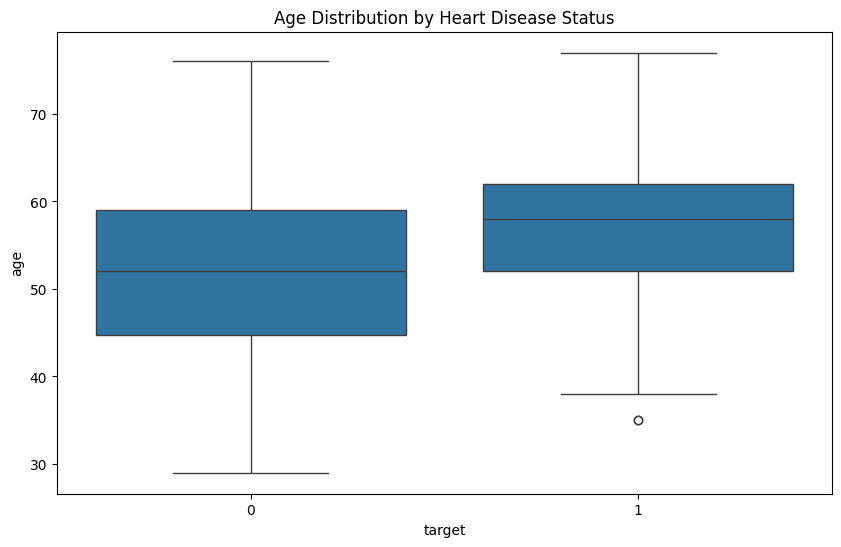

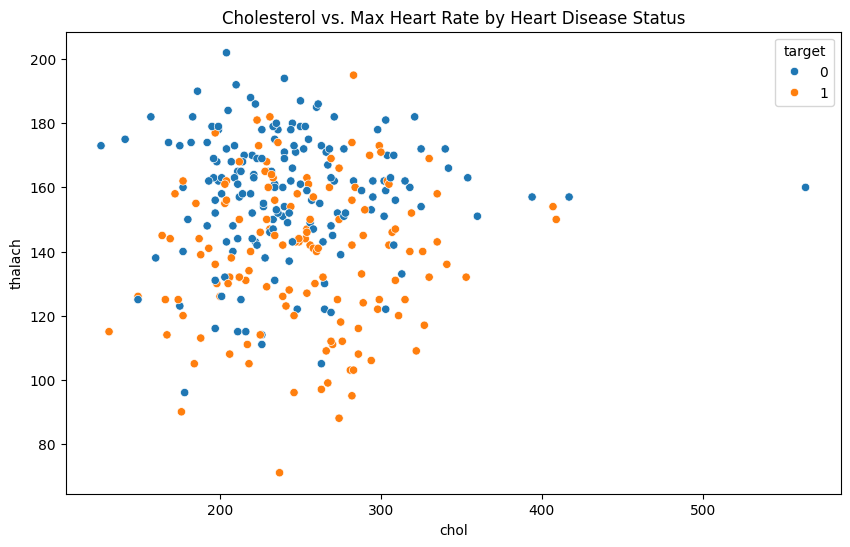

Selected features: ['thalach', 'oldpeak', 'sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'ca_2.0', 'thal_7.0']

Logistic Regression Results:
Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



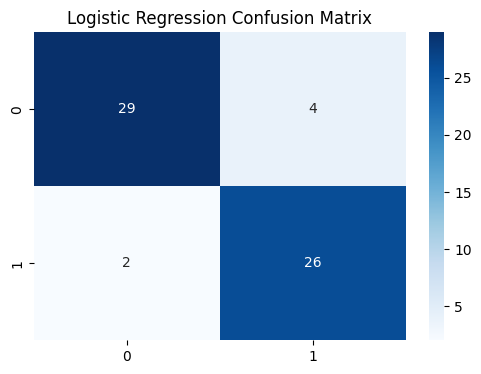

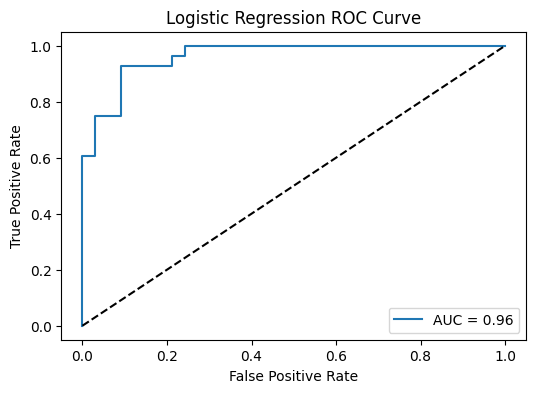


Decision Tree Results:
Accuracy: 0.819672131147541
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



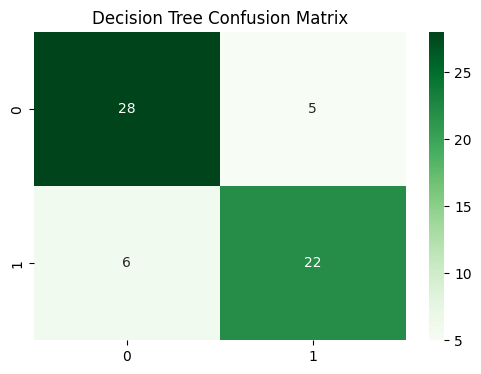

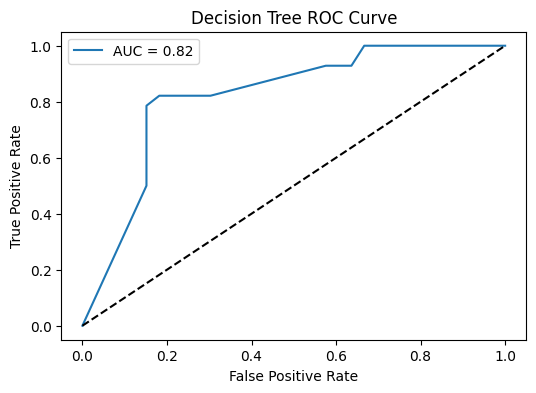

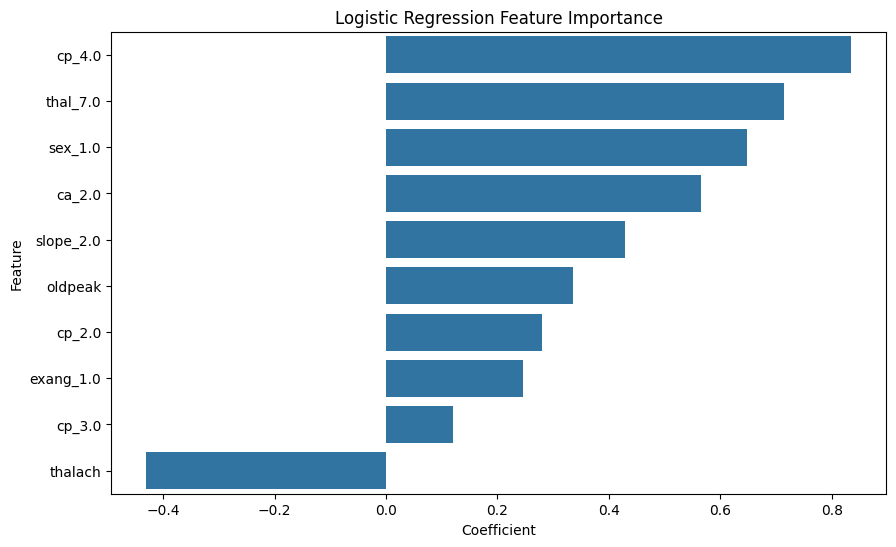

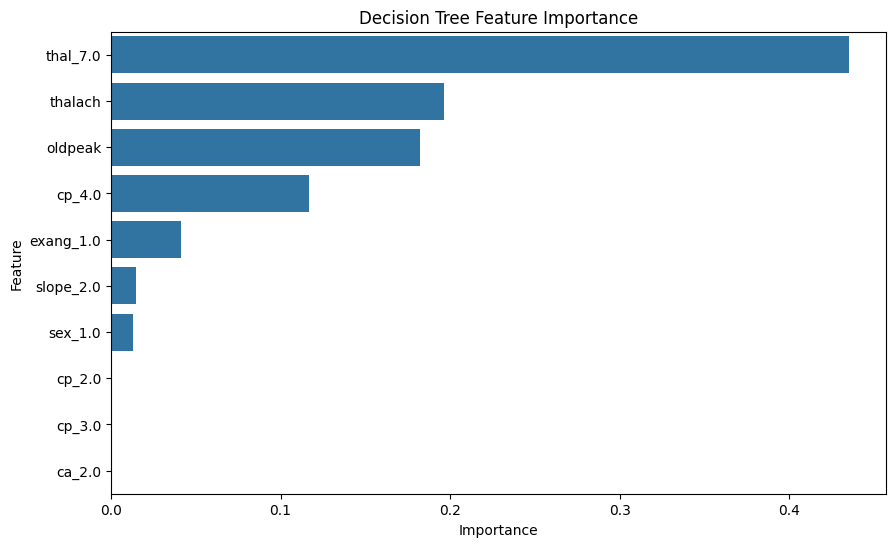

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                            roc_auc_score, roc_curve, classification_report)
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names, na_values='?')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

# Convert target to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Convert categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[categorical_cols] = df[categorical_cols].astype('category')

print("\nData types:\n", df.dtypes)

# Basic statistics
print("Dataset shape:", df.shape)
print("\nSummary statistics:\n", df.describe())

# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# Age distribution by heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.show()

# Cholesterol vs. Max Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalach', hue='target', data=df)
plt.title('Cholesterol vs. Max Heart Rate by Heart Disease Status')
plt.show()


# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Feature selection
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected features:", list(selected_features))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba_lr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt),
            annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba_dt):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend()
plt.show()

# Logistic Regression Coefficients
lr_coef = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coef)
plt.title('Logistic Regression Feature Importance')
plt.show()

# Decision Tree Feature Importance
dt_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance)
plt.title('Decision Tree Feature Importance')
plt.show()

/tmp/ipython-input-5-680773898.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Linear Regression RMSE: 3.11
Random Forest RMSE: 25.69


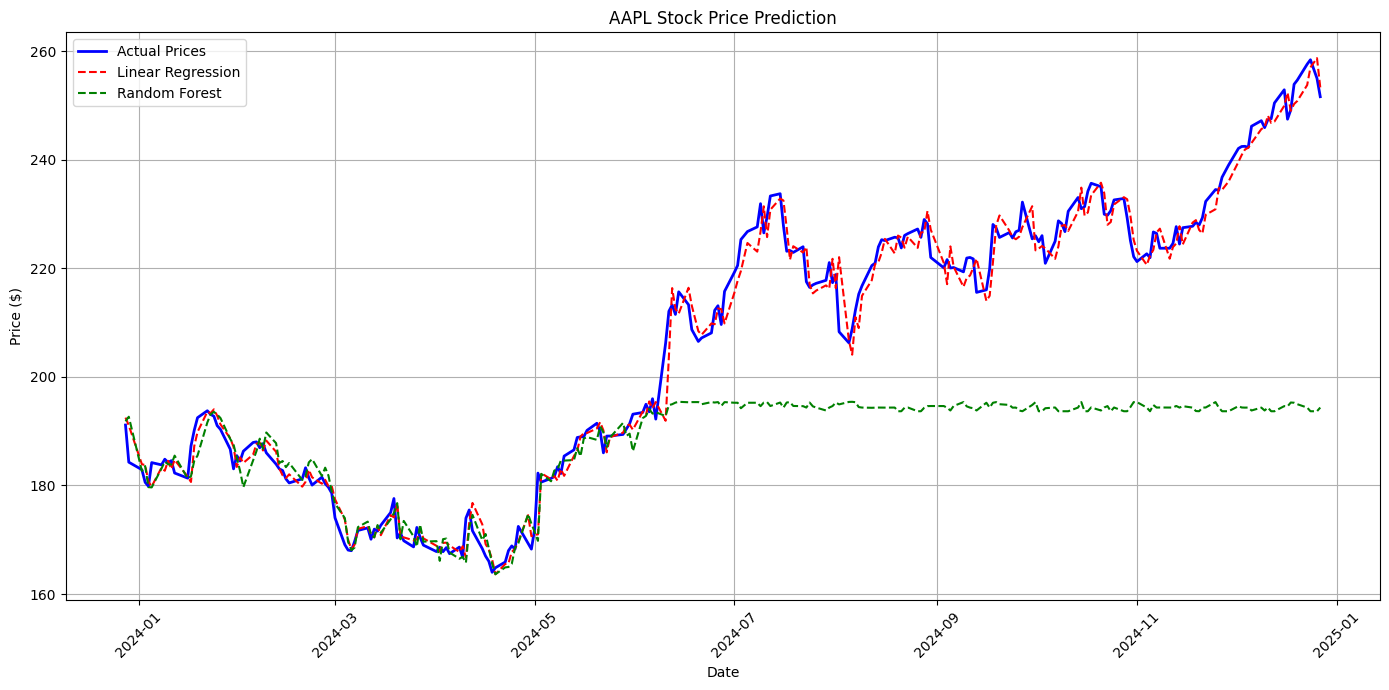

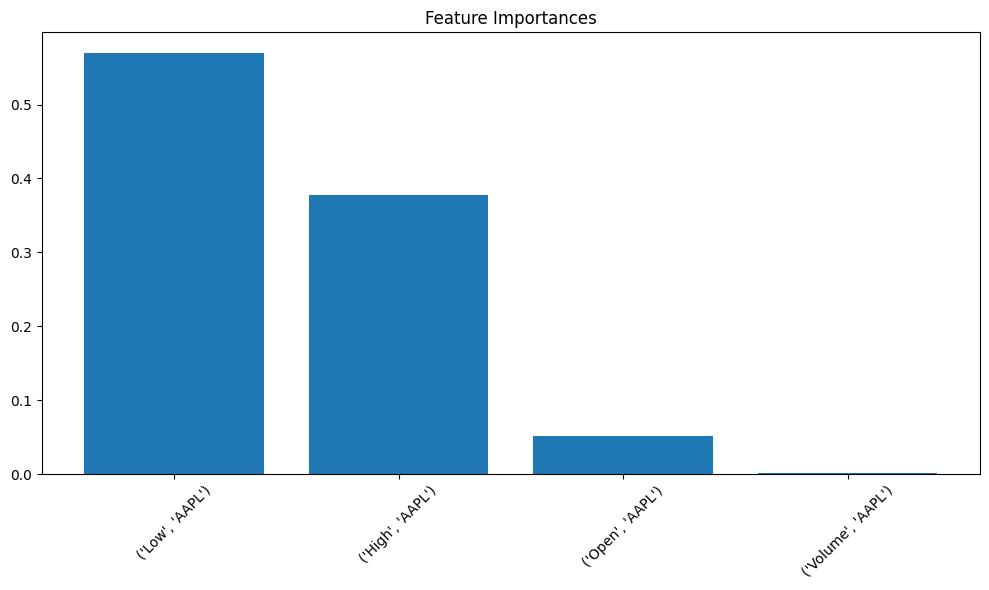

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fetch data
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2024-12-31')

# Prepare data
stock_data['Next Close'] = stock_data['Close'].shift(-1)
stock_data = stock_data[:-1]
features = ['Open', 'High', 'Low', 'Volume']
X = stock_data[features]
y = stock_data['Next Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")

# Visualize
plot_dates = stock_data.index[-len(y_test):]
plt.figure(figsize=(14, 7))
plt.plot(plot_dates, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.plot(plot_dates, lr_predictions, label='Linear Regression', color='red', linestyle='--')
plt.plot(plot_dates, rf_predictions, label='Random Forest', color='green', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()